In [1]:
from sklearn.datasets import fetch_openml

# Télécharger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

# Accéder aux données (images) et aux étiquettes (labels)
X, y = mnist['data'], mnist['target']

# Afficher la forme des données pour confirmation
print(f"Forme des données (images): {X.shape}")
print(f"Forme des labels: {y.shape}")


Forme des données (images): (70000, 784)
Forme des labels: (70000,)


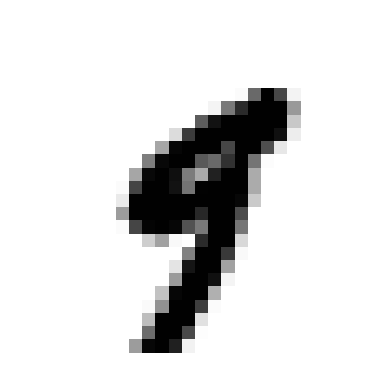

Label de l'image: 9


In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous d'obtenir des arrays NumPy
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

some_digit_index = 36000
some_digit = X[some_digit_index]
some_digit_image = some_digit.reshape(28, 28)  # Redimensionner de 784 à 28x28 pixels pour l'affichage

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

print(f"Label de l'image: {y[some_digit_index]}")

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

# Télécharger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Permutation aléatoire des données d'entraînement
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Affichage des dimensions pour vérification
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de y_train:", y_train.shape)

Dimensions de X_train: (60000, 784)
Dimensions de y_train: (60000,)


In [4]:
# -*-coding:Utf-8 -*
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import numpy as np

# Télécharger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Permutation aléatoire des données d'entraînement pour mélanger les données
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Création des vecteurs cibles pour l'entraînement et le test
y_train_5 = (y_train == '5')  # True pour les 5, False pour les autres chiffres
y_test_5 = (y_test == '5')

# Sélection du classificateur SGD
sgd_clf = SGDClassifier(random_state=42)

# Entraînement du classificateur sur l'ensemble d'entraînement
sgd_clf.fit(X_train, y_train_5)

# Utilisation du classificateur pour prédire si une image représente un 5
prediction = sgd_clf.predict([X[36000]])

print("La prédiction pour l'image sélectionnée est :", prediction)

La prédiction pour l'image sélectionnée est : [False]


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
import numpy as np

# Assurez-vous d'obtenir des arrays NumPy
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Convertir les étiquettes en booléens : True pour les '5', False pour les autres chiffres
y_5 = (y == '5')

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train_5, y_test_5 = X[:60000], X[60000:], y_5[:60000], y_5[60000:]

# Initialiser le SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Évaluer le SGDClassifier à l'aide d'une validation croisée
sgd_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print("Scores d'accuracy pour SGDClassifier :", sgd_scores)

Scores d'accuracy pour SGDClassifier : [0.95035 0.96035 0.9604 ]


In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import numpy as np

# Assurez-vous d'obtenir des arrays NumPy
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Convertir les étiquettes en booléens : True pour les '5', False pour les autres chiffres
y_5 = (y == '5')

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train_5, y_test_5 = X[:60000], X[60000:], y_5[:60000], y_5[60000:]

# Définir le classificateur "Never 5"
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# Initialiser le classificateur "Never 5"
never_5_clf = Never5Classifier()

# Évaluer le classificateur "Never 5" à l'aide d'une validation croisée
never_5_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print("Scores d'accuracy pour le classificateur 'Never 5':", never_5_scores)


Scores d'accuracy pour le classificateur 'Never 5': [0.91125 0.90855 0.90915]


In [7]:
# -*- coding: utf-8 -*-


from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml

# Téléchargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Convertir les étiquettes en booléens : True pour les '5', False pour les autres chiffres
y_5 = (y == '5')

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train_5, y_test_5 = X[:60000], X[60000:], y_5[:60000], y_5[60000:]

# Initialiser le SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Générer les prédictions avec cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Calculer la précision et le rappel
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"Précision: {precision}")
print(f"Rappel: {recall}")


Précision: 0.8370879772350012
Rappel: 0.6511713705958311


In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Téléchargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement avec les classes originales (0-9)
sgd_clf.fit(X_train, y_train)

# Faire une prédiction
some_digit = X[0]  # Vous pouvez choisir une autre image si vous le souhaitez
print("Prédiction du SGDClassifier :", sgd_clf.predict([some_digit]))


Prédiction du SGDClassifier : ['5']


In [9]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Téléchargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le classificateur binaire SGDClassifier
binary_clf = SGDClassifier(random_state=42)

# Initialiser le classificateur multiclasse OneVsOneClassifier basé sur le SGDClassifier binaire
ovo_clf = OneVsOneClassifier(binary_clf)

# Entraîner le modèle sur l'ensemble d'entraînement
ovo_clf.fit(X_train, y_train)

# Faire une prédiction
some_digit = X[0]  # Vous pouvez choisir une autre image si vous le souhaitez
print("Prédiction du classificateur OvO :", ovo_clf.predict([some_digit]))

# Afficher le nombre de classificateurs binaires utilisés par le classificateur OvO
print("Nombre de classificateurs binaires :", len(ovo_clf.estimators_))


Prédiction du classificateur OvO : ['5']
Nombre de classificateurs binaires : 45


In [10]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Charger le jeu de données MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Créer et entraîner le classificateur SGD
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# Faire une prédiction sur une instance
some_digit = X_test_scaled[0]
prediction = sgd_clf.predict([some_digit])
print("Prediction:", prediction)


Prediction: ['8']


In [11]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

# Charger le jeu de données MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Créer et entraîner le classificateur OvO basé sur SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train_scaled, y_train)

# Faire une prédiction sur une instance
some_digit = X_test_scaled[0]
prediction = ovo_clf.predict([some_digit])
print("Prediction:", prediction)
print("Nombre d'estimateurs:", len(ovo_clf.estimators_))



Prediction: ['8']
Nombre d'estimateurs: 45


In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger le jeu de données MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Créer un classificateur SGD avec un nombre maximal d'itérations plus élevé
sgd_clf = SGDClassifier(max_iter=2000, tol=1e-3, random_state=42)

# Évaluer le classificateur à l'aide de la validation croisée
scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# Afficher les résultats de l'évaluation
print("Exactitude moyenne:", scores.mean())
print("Exactitude pour chaque fold:", scores)


Exactitude moyenne: 0.9057856306782172
Exactitude pour chaque fold: [0.91000161 0.90625167 0.90110361]
